<a href="https://colab.research.google.com/github/PamelaPaolaCB/Visualizacion-AG/blob/main/Actividad_Guiada_3_PamelaContreras_08MBID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esta actividad pertenece a : Pamela Paola Contreras Bardales

In [1]:
#Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [2]:
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))

Aqui veremos las variables que tenemos y el tipo de datos

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Aquí veremos los primeros registros de la data

In [4]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Renombraremos algunas columnas

* columna class=clase y fare=tarifa


In [5]:
titanic.rename(columns={'class': 'clase'},
inplace=True)
titanic.rename(columns={'fare': 'tarifa'},
inplace=True)

Muestra los valores diferentes de cada clase

In [7]:
titanic.clase.unique()

array(['Third', 'First', 'Second'], dtype=object)

Añadiremos nuevas columnas

In [8]:
def is_old_func(row):
 return row['age'] > 60
titanic['is_old'] = titanic.apply(is_old_func, axis='columns')

Pero, existe, otra manera? Pues veamos

In [9]:
titanic.eval ( ' is_baby = age< 15 ' , inplace = True)

Define una variable numérica

In [10]:
def class_num_func(row):
 Clase={'Third':3,'First':1,'Second':2}
 return Clase[row.clase]
titanic['class_num'] = titanic.apply(class_num_func, axis='columns')

Vamos a consultar las condiciones

In [11]:
titanic[
 (titanic.sex == 'female')
 & (titanic['clase'].isin(['First', 'Third']))
 & (titanic.age > 45 )
 & (titanic.survived == 0)
]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


Distribución del Target (Variable dependiente)

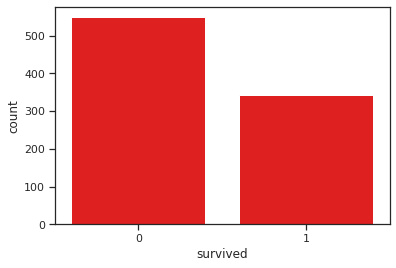

In [36]:
sns.countplot(x='survived',data=titanic, color = 'red')
plt.show()

In [38]:
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


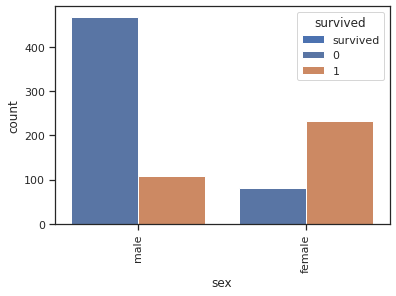

In [39]:
titanic[['sex','survived']].groupby(['sex']).mean().plot.bar()
sns.countplot('sex',hue='survived',data=titanic,)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


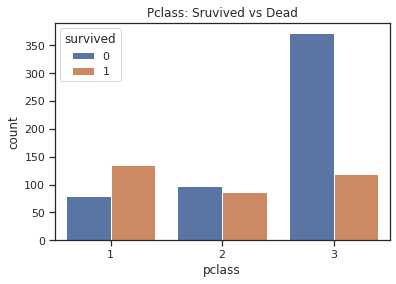

In [40]:
sns.countplot('pclass', hue='survived', data=titanic)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


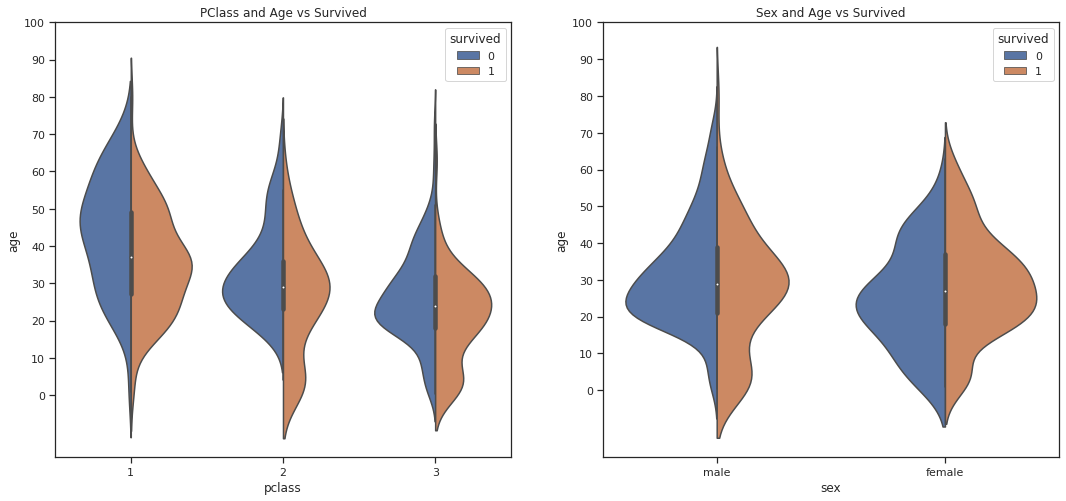

In [43]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('pclass','age',hue='survived',data=titanic,split=True,ax=ax[0])
ax[0].set_title('PClass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("sex","age", hue="survived", data=titanic,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Distribución de las clases

<AxesSubplot:xlabel='pclass', ylabel='count'>

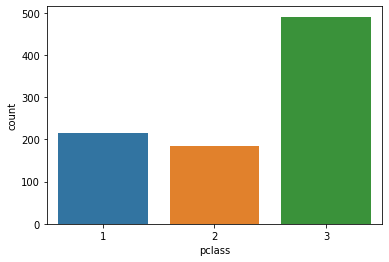

In [12]:
sns.countplot(x="pclass", data=titanic)

Distribución de los sexos

<AxesSubplot:xlabel='sex', ylabel='count'>

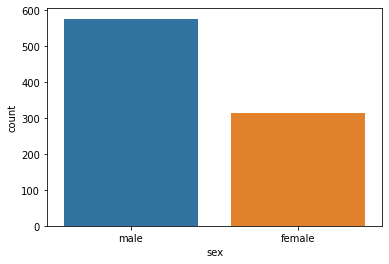

In [13]:
sns.countplot(x="sex", data=titanic)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


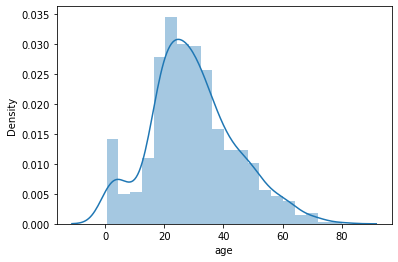

In [14]:
#Distribución de la edad(ege)
sns.distplot(titanic.age.dropna( ))
plt.show( )

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


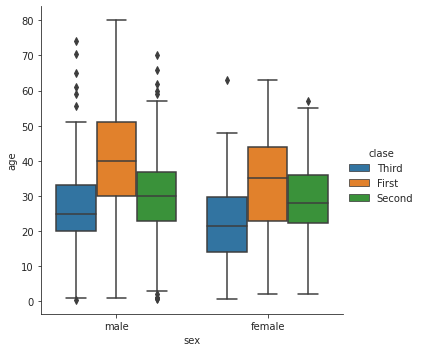

In [15]:
#BoxPlot de la edad por sexo y clase
with sns.axes_style(style='ticks'):
 ax = sns.catplot("sex", "age", "clase" ,
data=titanic, kind="box")

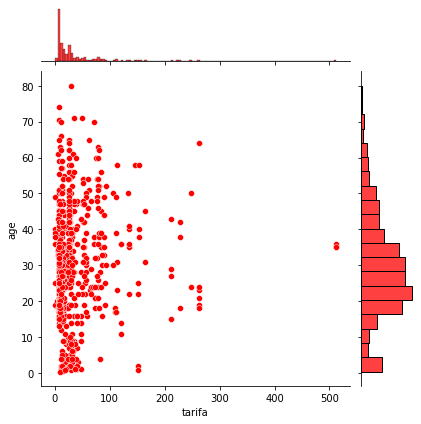

In [17]:
#Distribución cruzada de Edad y Tarifa
sns.jointplot(x='tarifa',y='age',data=titanic, color='red')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

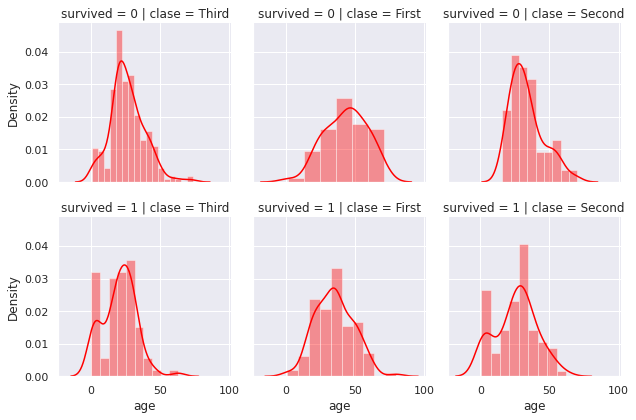

In [21]:
#Cambiamos el font
sns.set(font_scale=1)
#FacetGrid - Construir una matriz de gráficos
g = sns.FacetGrid(titanic, row='survived',col='clase')
g.map(sns.distplot, "age", color = 'red')
plt.show()

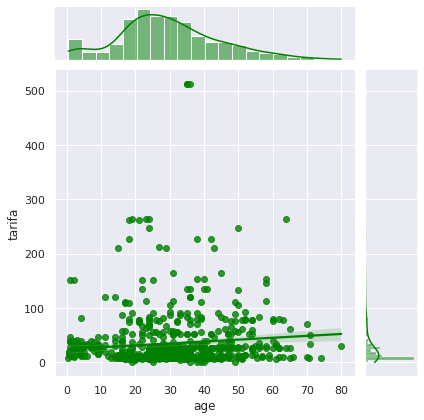

In [22]:
#Diagrama de dispersion con Distribucion de cada
#variable: fare(precio)/age(edad)
sns.jointplot(data=titanic, x='age', y='tarifa',
kind='reg', color='green')
plt.show()

Text(0.5, 1.0, 'titanic.corr()')

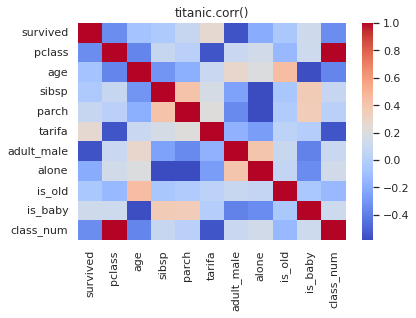

In [28]:
# Mapa de calor de correlaciones
tc = titanic.corr()
sns.heatmap(tc,cmap='coolwarm')
plt.title('titanic.corr()')

Define un subconjuto de datos con las variables

In [29]:
#numéricas
titanic_num = titanic[['survived','pclass','sibsp','parch','tarifa']]

Hacer un diagrama de dispersión

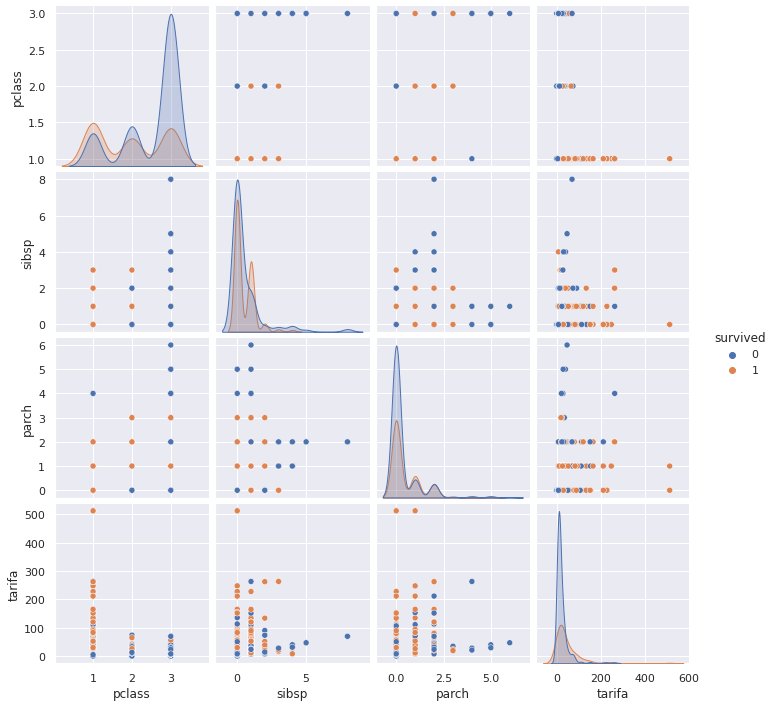

In [30]:
sns.pairplot(titanic_num, hue="survived")
plt.show()

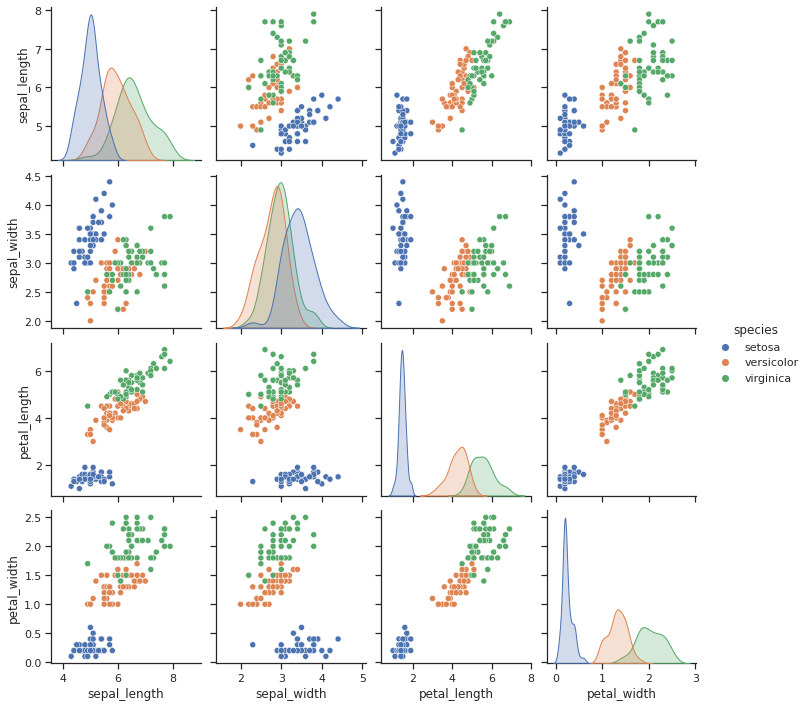

In [44]:
#Establece el estilo estético de las tramas
sns.set(style="ticks")
#Carga el data set
df = sns.load_dataset("iris")
#matriz de diagramas de dispersion
sns.pairplot(df, hue="species")